# Moment Classification Example

## Loading Moment Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import MomentModel
from tsfmproject.dataset import MomentDataset
from tsfmproject.models.moment.momentfm.models.statistical_classifiers import fit_svm
from tsfmproject.utils import load_args

arg_path = "../config/moment_classification.json"
args = load_args(arg_path)
mmt = MomentModel(**args)

## Use a SVM classifier to evaluate zero-shot embeddings of Moment model

In [2]:
train_dataset = MomentDataset(name="ecg5000", path='/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ECG5000_TRAIN.csv',  
                              batchsize=64, mode='train', task_name='classification')
test_dataset = MomentDataset(name="ecg5000", path='/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ECG5000_TEST.csv',
                             batchsize=64, mode='test', task_name='classification')

train_accuracy, train_embeddings, train_labels = mmt.evaluate(train_dataset, task_name='classification')
test_accuracy, test_embeddings, test_labels = mmt.evaluate(test_dataset, task_name='classification')
print(train_embeddings.shape, train_labels.shape)

clf = fit_svm(features=train_embeddings, y=train_labels)

y_pred_train = clf.predict(train_embeddings)
y_pred_test = clf.predict(test_embeddings)
train_accuracy = clf.score(train_embeddings, train_labels)
test_accuracy = clf.score(test_embeddings, test_labels)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

(500, 1024) (500,)


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Train accuracy: 0.99
Test accuracy: 0.93


## Visualize the embeddings

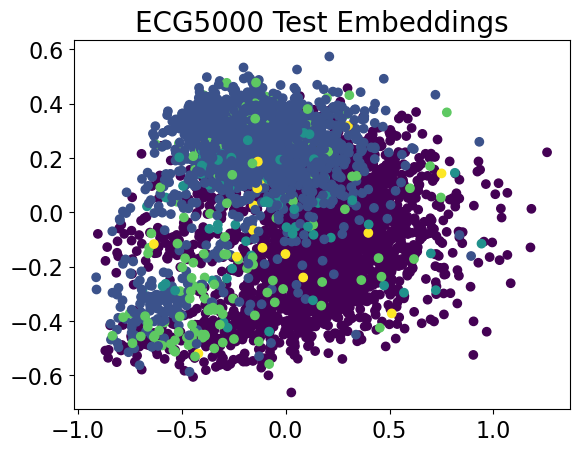

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


test_embeddings_manifold = PCA(n_components=2).fit_transform(test_embeddings) 

plt.title(f"ECG5000 Test Embeddings", fontsize=20)
plt.scatter(
    test_embeddings_manifold[:, 0], 
    test_embeddings_manifold[:, 1],
    c=test_labels.squeeze()
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Finetune Moment model for classification

In [4]:
finetuned_model = mmt.finetune(train_dataset, task_name='classification', epoch=10, lr=0.1)

/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 1.187
Epoch 1: Train loss: 0.857
Epoch 2: Train loss: 0.824
Epoch 3: Train loss: 0.769
Epoch 4: Train loss: 0.688
Epoch 5: Train loss: 0.619
Epoch 6: Train loss: 0.544
Epoch 7: Train loss: 0.529
Epoch 8: Train loss: 0.479
Epoch 9: Train loss: 0.485


## Evaluate the finetuned model

In [5]:
accuracy, embeddings, lebels = mmt.evaluate(test_dataset, task_name='classification')
print(accuracy)

0.84
